In [1]:
import os
import sys
!git clone --single-branch --branch fix-gan-2-steps https://github.com/TensorSpeech/TensorFlowTTS.git
os.chdir("TensorFlowTTS")
!pip install .
os.chdir("..")
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4835 (delta 1), reused 0 (delta 0), pack-reused 4833
Receiving objects: 100% (4835/4835), 62.34 MiB | 29.80 MiB/s, done.
Resolving deltas: 100% (3164/3164), done.
Processing /content/TensorFlowTTS
     |████████████████████████████████| 394.7MB 42kB/s 
     |████████████████████████████████| 706kB 43.0MB/s 
     |████████████████████████████████| 184kB 47.3MB/s 
     |████████████████████████████████| 245kB 39.7MB/s 
     |████████████████████████████████| 225kB 34.2MB/s 
     |████████████████████████████████| 1.3MB 30.0MB/s 
     |████████████████████████████████| 1.7MB 39.2MB/s 
     |████████████████████████████████| 3.1MB 39.4MB/s 
  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-wj0y8tib/german-transliterate
  Running command git clone -q https://github.com/repodiac/german_t

In [2]:
print("Downloading FastSpeech2 model...")
!gdown --id {"145XsS-xY-T52mP2h0mmu8CSEL2-uMl7W"} -O fastspeech2.h5

Downloading...
From: https://drive.google.com/uc?id=145XsS-xY-T52mP2h0mmu8CSEL2-uMl7W
To: /content/fastspeech2.h5
128MB [00:00, 156MB/s]


In [3]:
print("Downloading Multi-band MelGAN model...")
!gdown --id {"14Ki1MsRRiBU867WtapRSKMAVGGqQePKq"} -O mb.melgan.h5
#!gdown --id {"1YTpG7SzrfHzXWpiSqNlSwa6dM9fTg_jB"} -O mb.melgan.h5
#!gdown --id {"1U2_sLGz3R1Eu03Gq50asga6D_Z7aPoUP"} -O mb.melgan.h5 #original 
!gdown --id {"1l2jBwTWVVsRuT5FLDOIDToEhqWBmuCMe"} -O mb.melgan.yaml

Downloading...
From: https://drive.google.com/uc?id=14Ki1MsRRiBU867WtapRSKMAVGGqQePKq
To: /content/mb.melgan.h5
8.65MB [00:00, 20.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l2jBwTWVVsRuT5FLDOIDToEhqWBmuCMe
To: /content/mb.melgan.yaml
100% 5.73k/5.73k [00:00<00:00, 5.75MB/s]


In [4]:
print("Downloading HifiGAN model...")
!gdown --id {"1Tz-ek_kCLNbEZSJB0_uSmqhrDaZuaPa3"} -O hifigan.h5 
!gdown --id {"1l2jBwTWVVsRuT5FLDOIDToEhqWBmuCMe"} -O hifigan.yaml

Downloading...
From: https://drive.google.com/uc?id=1Tz-ek_kCLNbEZSJB0_uSmqhrDaZuaPa3
To: /content/hifigan.h5
55.9MB [00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l2jBwTWVVsRuT5FLDOIDToEhqWBmuCMe
To: /content/hifigan.yaml
100% 5.73k/5.73k [00:00<00:00, 8.39MB/s]


In [5]:
# Removes the old files
%rm -rf /usr/local/lib/python3.6/dist-packages/tensorflow_tts/configs/fastspeech.py
%rm -rf /usr/local/lib/python3.6/dist-packages/tensorflow_tts/configs/fastspeech2.py
%rm -rf /usr/local/lib/python3.6/dist-packages/tensorflow_tts/models/fastspeech.py
%rm -rf /usr/local/lib/python3.6/dist-packages/tensorflow_tts/models/fastspeech2.py
%rm -rf /content/TensorFlowTTS/examples/fastspeech2_libritts/conf/fastspeech2libritts.yaml
%rm -rf /content/TensorFlowTTS/examples/fastspeech2_libritts/fastspeech2_dataset.py
%rm -rf /content/TensorFlowTTS/examples/fastspeech2_libritts/train_fastspeech2.py

In [ ]:
# add locations to copy the edited files
!cp -r configs/fastspeech.py_file_location /usr/local/lib/python3.6/dist-packages/tensorflow_tts/configs
!cp -r configs/fastspeech2.py_file_location /usr/local/lib/python3.6/dist-packages/tensorflow_tts/configs
!cp -r models/fastspeech.py_file_location /usr/local/lib/python3.6/dist-packages/tensorflow_tts/models
!cp -r models/fastspeech.py_file_location /usr/local/lib/python3.6/dist-packages/tensorflow_tts/models
!cp -r conf/fastspeech2libritts.yaml_file_location /content/TensorFlowTTS/examples/fastspeech2_libritts/conf/
!cp -r fastspeech2_dataset.py_file _location /content/TensorFlowTTS/examples/fastspeech2_libritts/
!cp -r train_fastspeech2.py_file_location /content/TensorFlowTTS/examples/fastspeech2_libritts/

In [6]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [7]:
fastspeech2_config = AutoConfig.from_pretrained('/content/TensorFlowTTS/examples/fastspeech2_libritts/conf/fastspeech2libritts.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="/content/fastspeech2.h5",
    name="libritts"
)

In [8]:
mb_melgan_config = AutoConfig.from_pretrained('/content/TensorFlowTTS/examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="/content/mb.melgan.h5",
    name="mb_melgan"
)

In [9]:
hifigan_config = AutoConfig.from_pretrained('/content/TensorFlowTTS/examples/hifigan/conf/hifigan.v1.yaml')
hifigan = TFAutoModel.from_pretrained(
    config=hifigan_config,
    pretrained_path="/content/hifigan.h5",
    name="hifigan"
)

In [10]:
processor = AutoProcessor.from_pretrained(pretrained_path="/content/drive/MyDrive/dump_emovdb/libritts_mapper.json")
processor.mode = False #"test"
processor.add_symbol("@?")
processor.add_symbol("@.")
processor.add_symbol("@,")

In [16]:
def do_synthesis(input_text, text2mel_model, speaker_id, emotion_id, vocoder_model, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)
  input_ids = [74 if x==86 else x for x in input_ids]
  input_ids = [74 if x==88 else x for x in input_ids]
  input_ids = [74 if x==83 else x for x in input_ids]

  print(processor.symbol_to_id)
  print(input_ids)

  # if speaker_id > 10000 or speaker_id < 0:
  #   raise ValueError("speaker_id should be in the range of [0, 19]")

  # text2mel part
  mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
      tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
      speaker_ids=tf.convert_to_tensor([speaker_id], dtype=tf.int32),
      emotion_ids=tf.convert_to_tensor([emotion_id], dtype=tf.int32),
      speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
      f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
      energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
  )
  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  return mel_outputs.numpy(), audio.numpy()


def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

{'@<pad>': 0, '@<unk>': 1, '@<s>': 2, '@</s>': 3, '@AA0': 4, '@AA1': 5, '@AA2': 6, '@AE0': 7, '@AE1': 8, '@AE2': 9, '@AH0': 10, '@AH1': 11, '@AH2': 12, '@AO0': 13, '@AO1': 14, '@AO2': 15, '@AW0': 16, '@AW1': 17, '@AW2': 18, '@AY0': 19, '@AY1': 20, '@AY2': 21, '@B': 22, '@CH': 23, '@D': 24, '@DH': 25, '@EH0': 26, '@EH1': 27, '@EH2': 28, '@ER0': 29, '@ER1': 30, '@ER2': 31, '@EY0': 32, '@EY1': 33, '@EY2': 34, '@F': 35, '@G': 36, '@HH': 37, '@IH0': 38, '@IH1': 39, '@IH2': 40, '@IY0': 41, '@IY1': 42, '@IY2': 43, '@JH': 44, '@K': 45, '@L': 46, '@M': 47, '@N': 48, '@NG': 49, '@OW0': 50, '@OW1': 51, '@OW2': 52, '@OY0': 53, '@OY1': 54, '@OY2': 55, '@P': 56, '@R': 57, '@S': 58, '@SH': 59, '@T': 60, '@TH': 61, '@UH0': 62, '@UH1': 63, '@UH2': 64, '@UW': 65, '@UW0': 66, '@UW1': 67, '@UW2': 68, '@V': 69, '@W': 70, '@Y': 71, '@Z': 72, '@ZH': 73, '@SIL': 74, '@END': 75, '!': 76, "'": 77, '(': 78, ')': 79, ',': 80, '.': 81, ':': 82, ';': 83, '?': 84, ' ': 85, '@?': 86, '@.': 87, '@,': 88}
[39, 60, 58, 

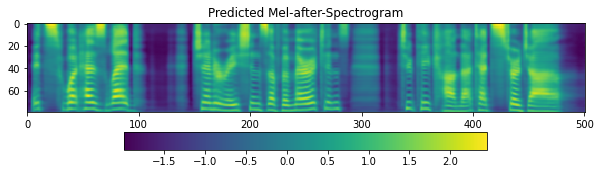

In [19]:
import IPython.display as ipd

# input_text = "I am Barack Obama,. The fourty fourth president of the United States"# I started my political career as a Illinois state senator, followed by serving as a Illinois US senator. I have a law degree from Harvard and taught constitutional law university of Chicago for many years"
#input_text = "As he set off for Everest in the spring of 1924, Mallory's thoughts were contradictory. One side of him was brimming with optimism. "
input_text = "It's what has led, generations of Americans, to take on that extra job"
# input_text = "Hello there my name is Bay Max"
# input_text = "It's what has led, generations of Americans, to take on that extra job, to sacrifice the small pleasures, to scrimp and save wherever they can, in hopes of pootting away enough, just enough, to give their child the education that they never had"
#input_text = "and you can focus on, what you should be focusing on."
#for speaker_id in range(28):
speaker_id = 3
emotion_id = 2
#speaker_id = 67 # speaker id is in the range of [0, 19]
mels, audios = do_synthesis(input_text, fastspeech2, speaker_id,emotion_id, mb_melgan, "MB-MELGAN")
print(speaker_id,emotion_id)
visualize_mel_spectrogram(mels[0])
ipd.display(ipd.Audio(audios, rate=24000))
  

In [ ]:
# to save an audio file
import numpy as np
from scipy.io.wavfile import write
sps = 24000
write('test.wav', sps, audios)